# Starting the analysis

## Importing Libs

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## Reading the data

In [10]:
# Carrega a tabela de atividade econômica
atividade_economica = pd.read_excel('atividade_economica.xls.xlsx', engine='openpyxl')

# Carrega a tabela da taxa Selic
taxa_selic = pd.read_excel('selic.xls.xlsx', engine='openpyxl')

# Carrega a tabela do ipca
ipca = pd.read_excel('ipca.xlsx', engine='openpyxl')

# Verifica as primeiras linhas das tabelas para entender a estrutura dos dados
print(atividade_economica.head())
print(taxa_selic.head())
print(ipca.head())


     DateTime  IBC-Br - atividade econômica
0  2013-12-01                          2.91
1  2014-01-01                          2.75
2  2014-02-01                          3.13
3  2014-03-01                          3.09
4  2014-04-01                          2.37
     DateTime  Selic
0  2013-11-04    9.5
1  2013-11-05    9.5
2  2013-11-06    9.5
3  2013-11-07    9.5
4  2013-11-08    9.5
     DateTime  meta para a inflação  IPCA ocorrido  Focus mais recente  \
0  2013-01-01                   4.5           6.15                 NaN   
1  2013-02-01                   NaN           6.31                 NaN   
2  2013-03-01                   NaN           6.59                 NaN   
3  2013-04-01                   NaN           6.49                 NaN   
4  2013-05-01                   NaN           6.50                 NaN   

   limite máximo  limite mínino  
0            6.5            2.5  
1            NaN            NaN  
2            NaN            NaN  
3            NaN            N

## PreProcess Data

In [25]:
atividade_economica.head()

,DateTime,IBC-Br - atividade econômica
0,2013-12-01,2.91
1,2014-01-01,2.75
2,2014-02-01,3.13
3,2014-03-01,3.09
4,2014-04-01,2.37


In [26]:
atividade_economica.isnull().sum()

DateTime                        0
IBC-Br - atividade econômica    0
dtype: int64

In [27]:
taxa_selic.head()

,DateTime,Selic
0,2013-11-04,9.5
1,2013-11-05,9.5
2,2013-11-06,9.5
3,2013-11-07,9.5
4,2013-11-08,9.5


In [28]:
taxa_selic.isnull().sum()

DateTime    0
Selic       0
dtype: int64

In [29]:
ipca.head()

,DateTime,meta para a inflação,IPCA ocorrido,Focus mais recente,limite máximo,limite mínino
0,2013-01-01,4.5,6.15,NaN,6.5,2.5
1,2013-02-01,NaN,6.31,NaN,NaN,NaN
2,2013-03-01,NaN,6.59,NaN,NaN,NaN
3,2013-04-01,NaN,6.49,NaN,NaN,NaN
4,2013-05-01,NaN,6.50,NaN,NaN,NaN


In [11]:
ipca.isnull().sum()

DateTime                  0
meta para a inflação    119
IPCA ocorrido             1
Focus mais recente      128
limite máximo           119
limite mínino           119
dtype: int64

In [19]:
ipca.columns.values

array(['DateTime', 'meta para a inflação', 'IPCA ocorrido',
       'Focus mais recente', 'limite máximo', 'limite mínino'],
      dtype=object)

### Cleaning the Data

In [23]:
ipca_remove_columns = ['meta para a inflação', 'Focus mais recente', 'limite máximo', 'limite mínino']
ipca_removed_columns = ipca.drop(ipca_remove_columns, axis=1)
ipca_removed_columns.head()

,DateTime,IPCA ocorrido
0,2013-01-01,6.15
1,2013-02-01,6.31
2,2013-03-01,6.59
3,2013-04-01,6.49
4,2013-05-01,6.50


### Merging the data

In [12]:
# Unir as tabelas com base na coluna 'DateTime' (ou outra coluna que seja a chave de relação)
tabelas_selic_atividade_economica_unidas = pd.merge(atividade_economica, taxa_selic, on='DateTime')

In [13]:
tabelas_selic_atividade_economica_unidas.head()

,DateTime,IBC-Br - atividade econômica,Selic
0,2013-12-01,2.91,10.00
1,2014-01-01,2.75,10.00
2,2014-02-01,3.13,10.50
3,2014-03-01,3.09,10.75
4,2014-04-01,2.37,10.75


In [31]:
tabelas_selic_atividade_economica_ipca_unidas = pd.merge(tabelas_selic_atividade_economica_unidas, ipca_removed_columns, on='DateTime')
tabelas_selic_atividade_economica_ipca_unidas.head()

,DateTime,IBC-Br - atividade econômica,Selic,IPCA ocorrido
0,2013-12-01,2.91,10.00,5.91
1,2014-01-01,2.75,10.00,5.59
2,2014-02-01,3.13,10.50,5.68
3,2014-03-01,3.09,10.75,6.15
4,2014-04-01,2.37,10.75,6.28


### Plotting the Graphs

#### Individual graphs

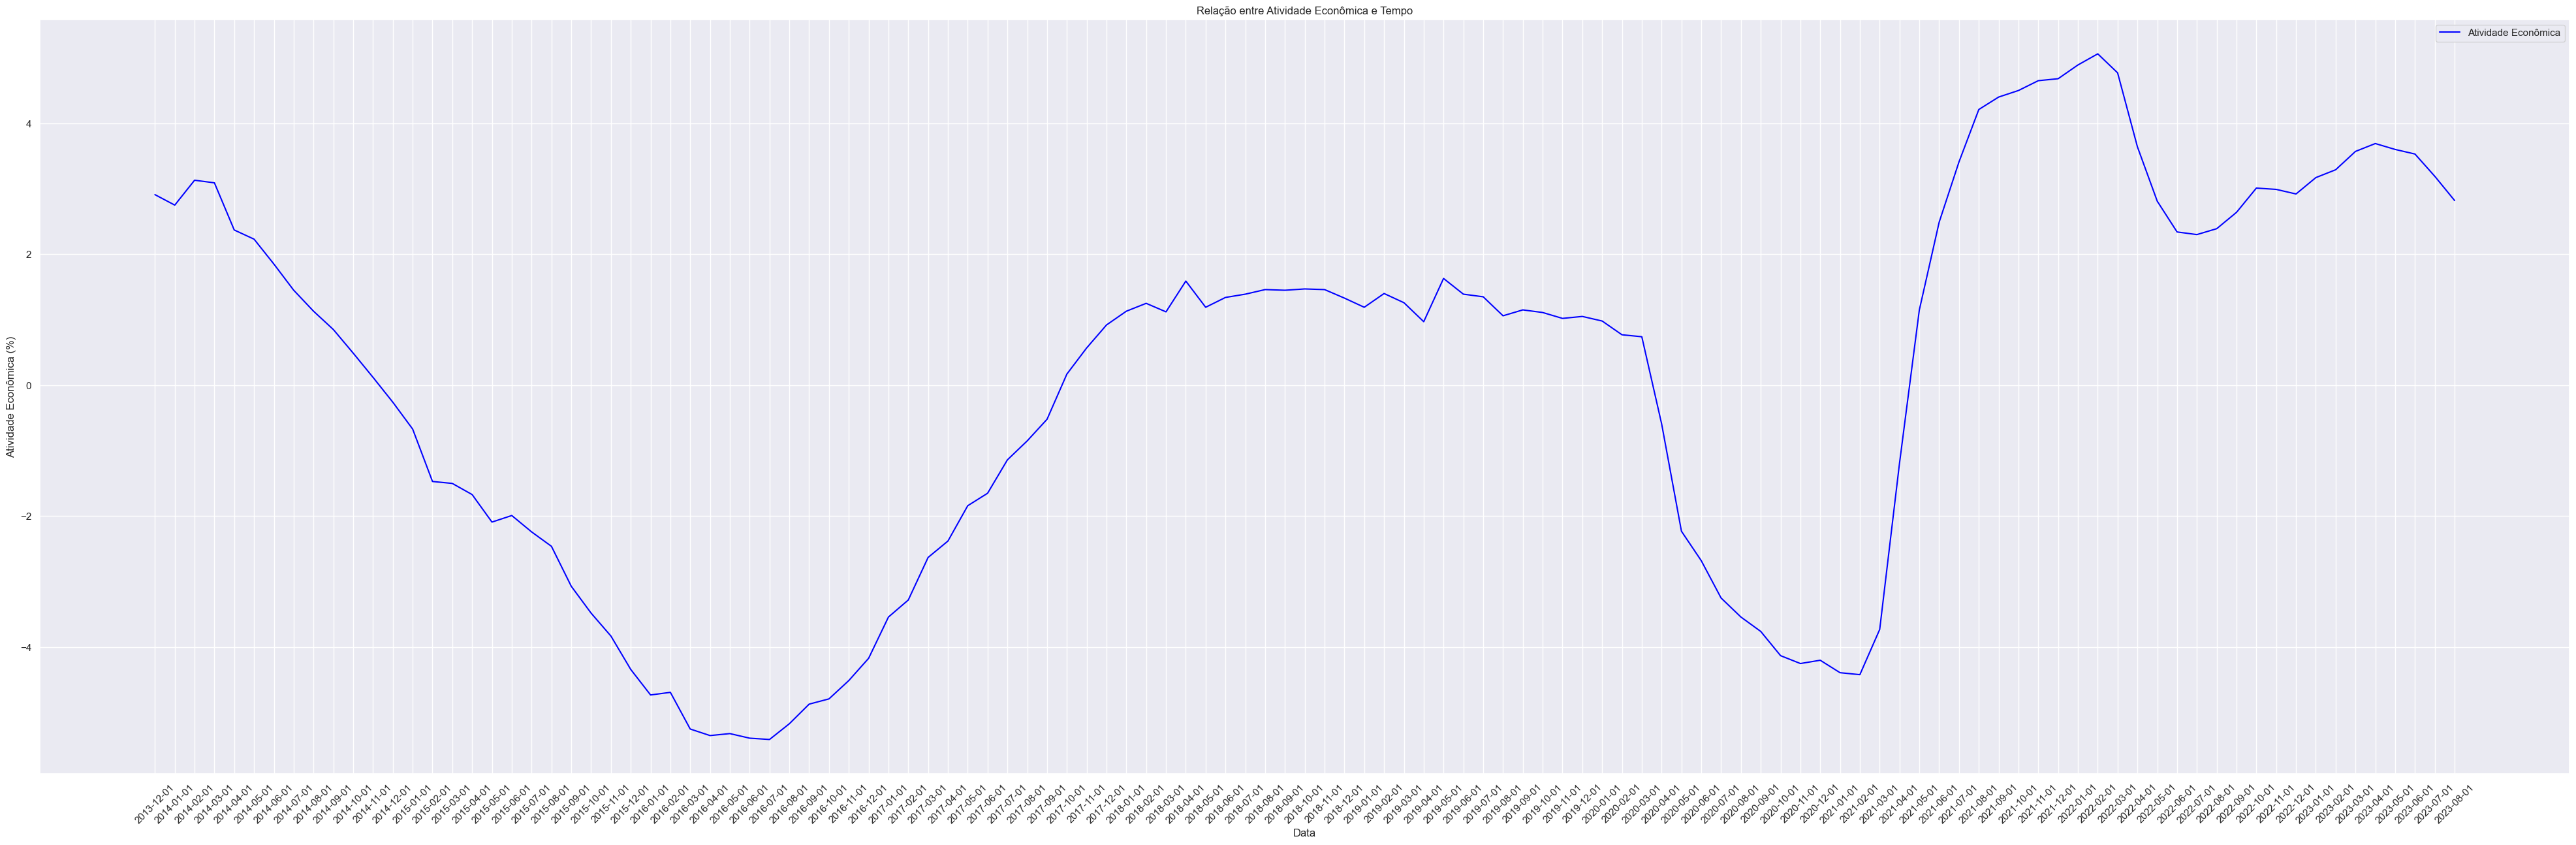

In [44]:
# Define o estilo do gráfico
sns.set(style="darkgrid")

# Cria o gráfico de linha
plt.figure(figsize=(50, 15))

# Plotar a Atividade Econômica
sns.lineplot(x=atividade_economica['DateTime'], y=atividade_economica['IBC-Br - atividade econômica'], label='Atividade Econômica', color='blue')
plt.xticks(rotation=45)

# Adiciona título e rótulos dos eixos
plt.title('Relação entre Atividade Econômica e Tempo')
plt.xlabel('Data')
plt.ylabel('Atividade Econômica (%)')

# Adiciona legenda
plt.legend()

# Exibe o gráfico
plt.show()

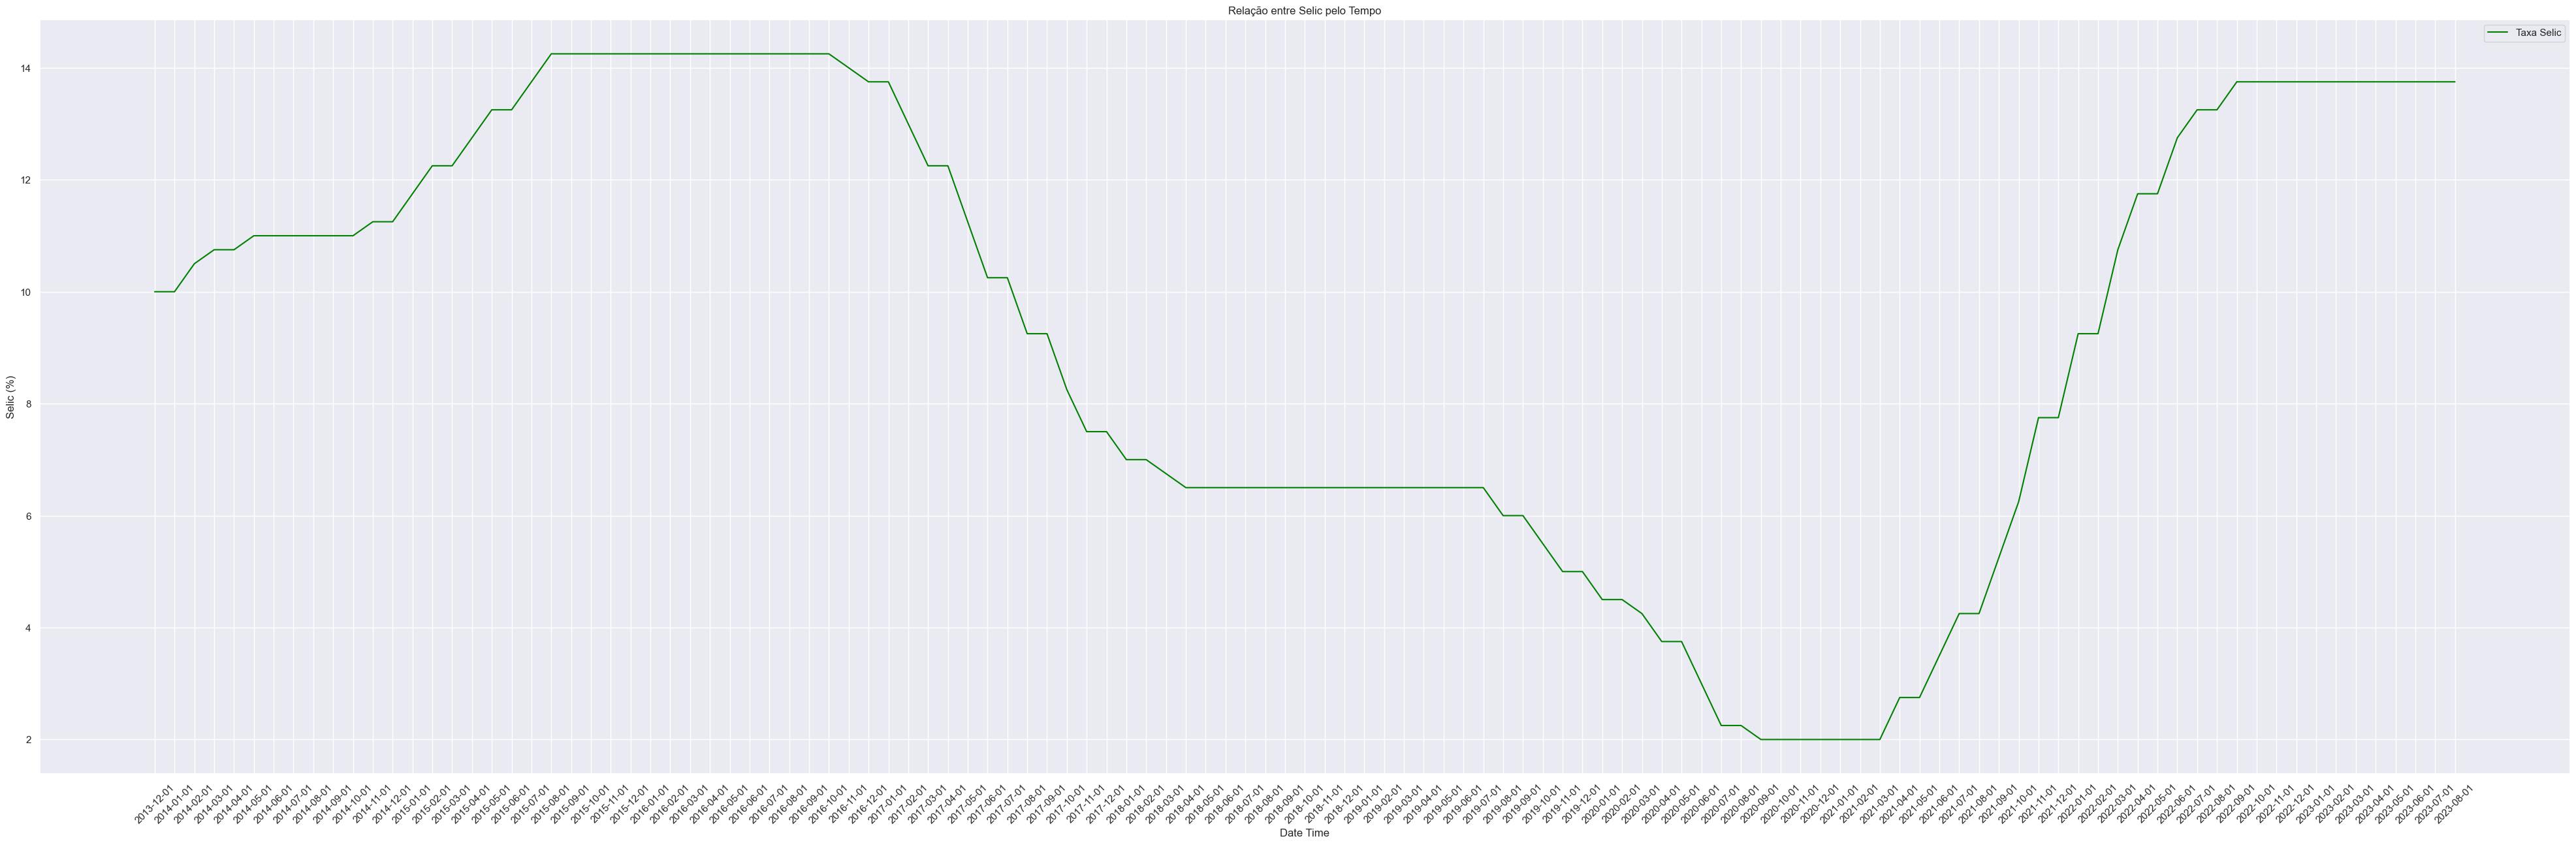

In [49]:
# Define o estilo do gráfico
sns.set(style="darkgrid")

# Cria o gráfico de linha
plt.figure(figsize=(50, 15))

# Plotar a Taxa Selic
sns.lineplot(x=tabelas_selic_atividade_economica_unidas['DateTime'], y=tabelas_selic_atividade_economica_unidas['Selic'], label='Taxa Selic', color='green')
plt.xticks(rotation=45)

# Adiciona título e rótulos dos eixos
plt.title('Relação entre Selic pelo Tempo')
plt.xlabel('Date Time')
plt.ylabel('Selic (%)')

# Adiciona legenda
plt.legend()

# Exibe o gráfico
plt.show()

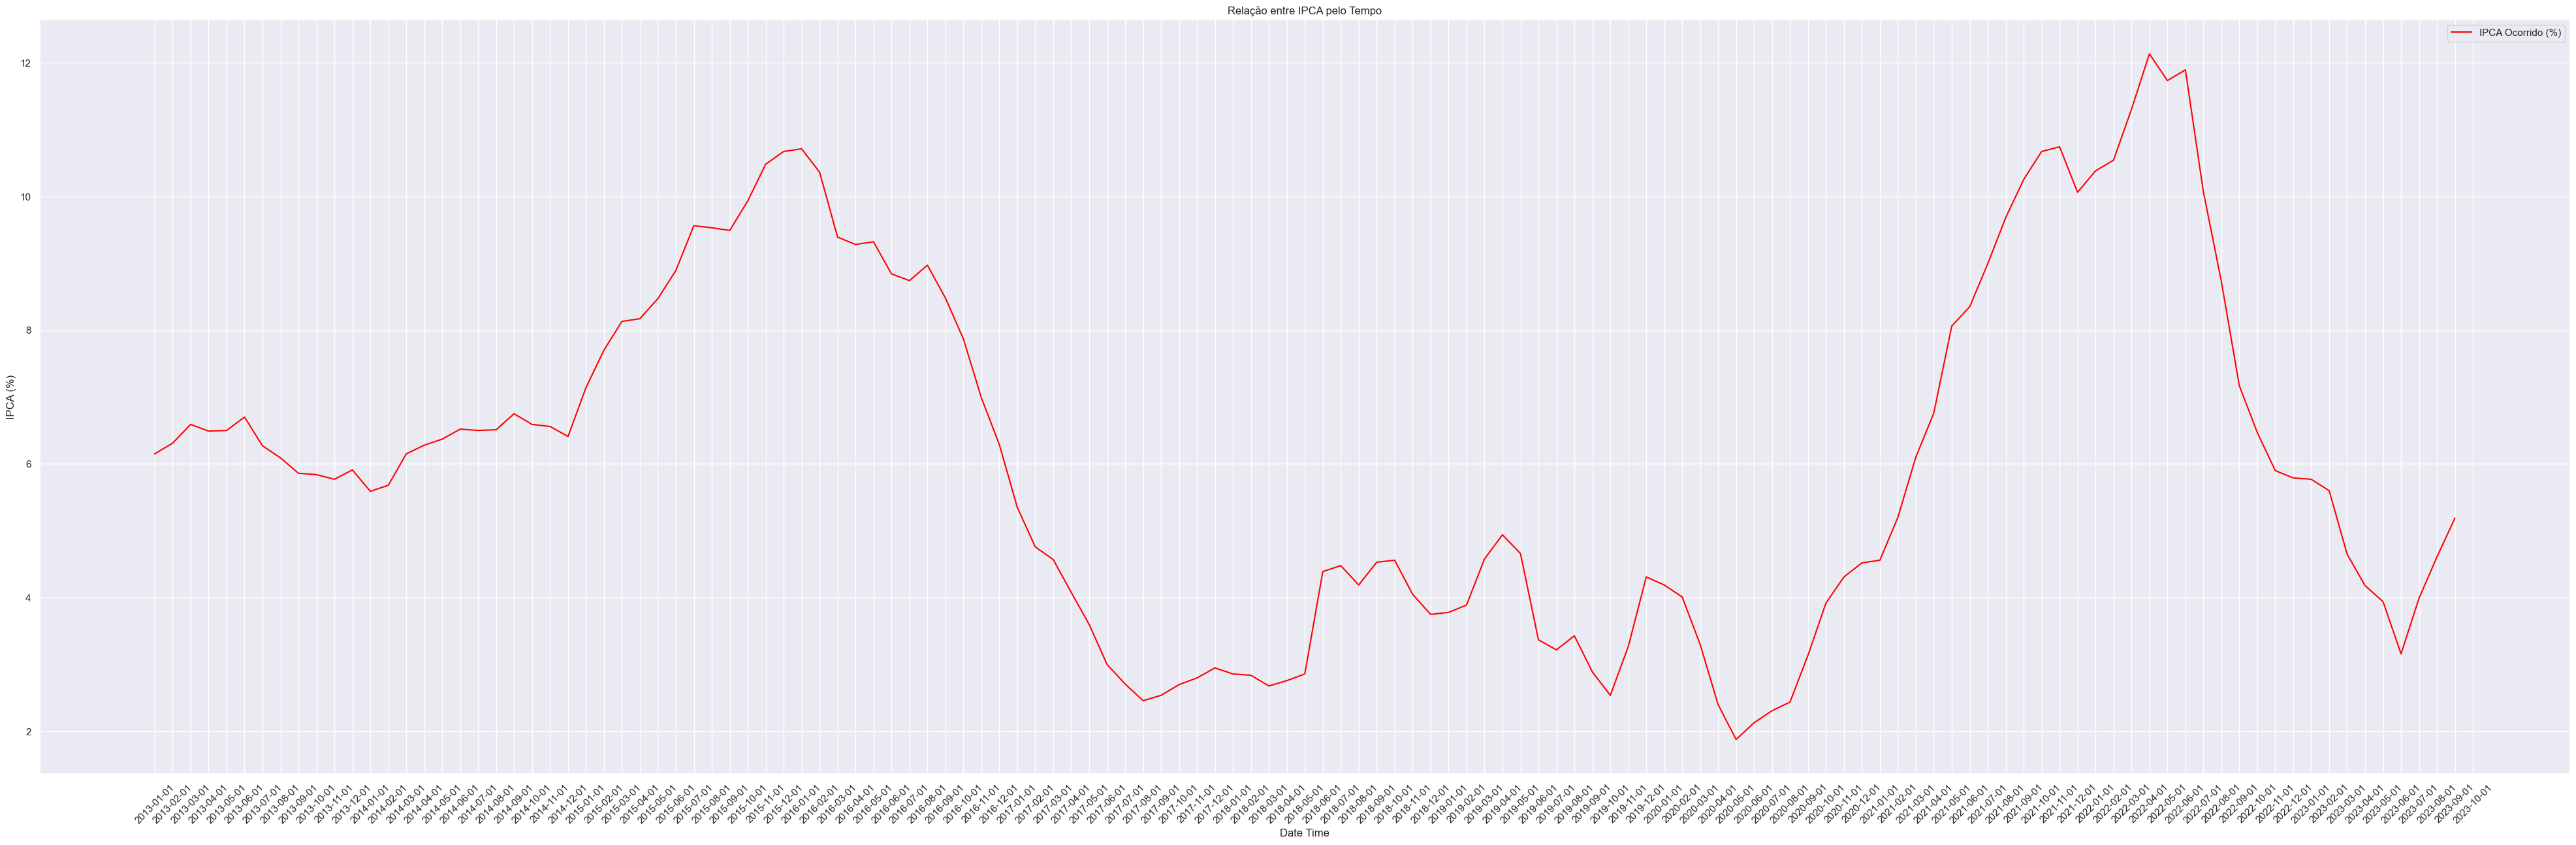

In [42]:
# Define o estilo do gráfico
sns.set(style="darkgrid")

# Cria o gráfico de linha
plt.figure(figsize=(50, 15))

# Plotar a Taxa Selic
sns.lineplot(x=ipca_removed_columns['DateTime'], y=ipca_removed_columns['IPCA ocorrido'], label='IPCA Ocorrido (%)', color='red')
plt.xticks(rotation=45)

# Adiciona título e rótulos dos eixos
plt.title('Relação entre IPCA pelo Tempo')
plt.xlabel('Date Time')
plt.ylabel('IPCA (%)')

# Adiciona legenda
plt.legend()

# Exibe o gráfico
plt.show()

#### Grouped Parameters Graphs

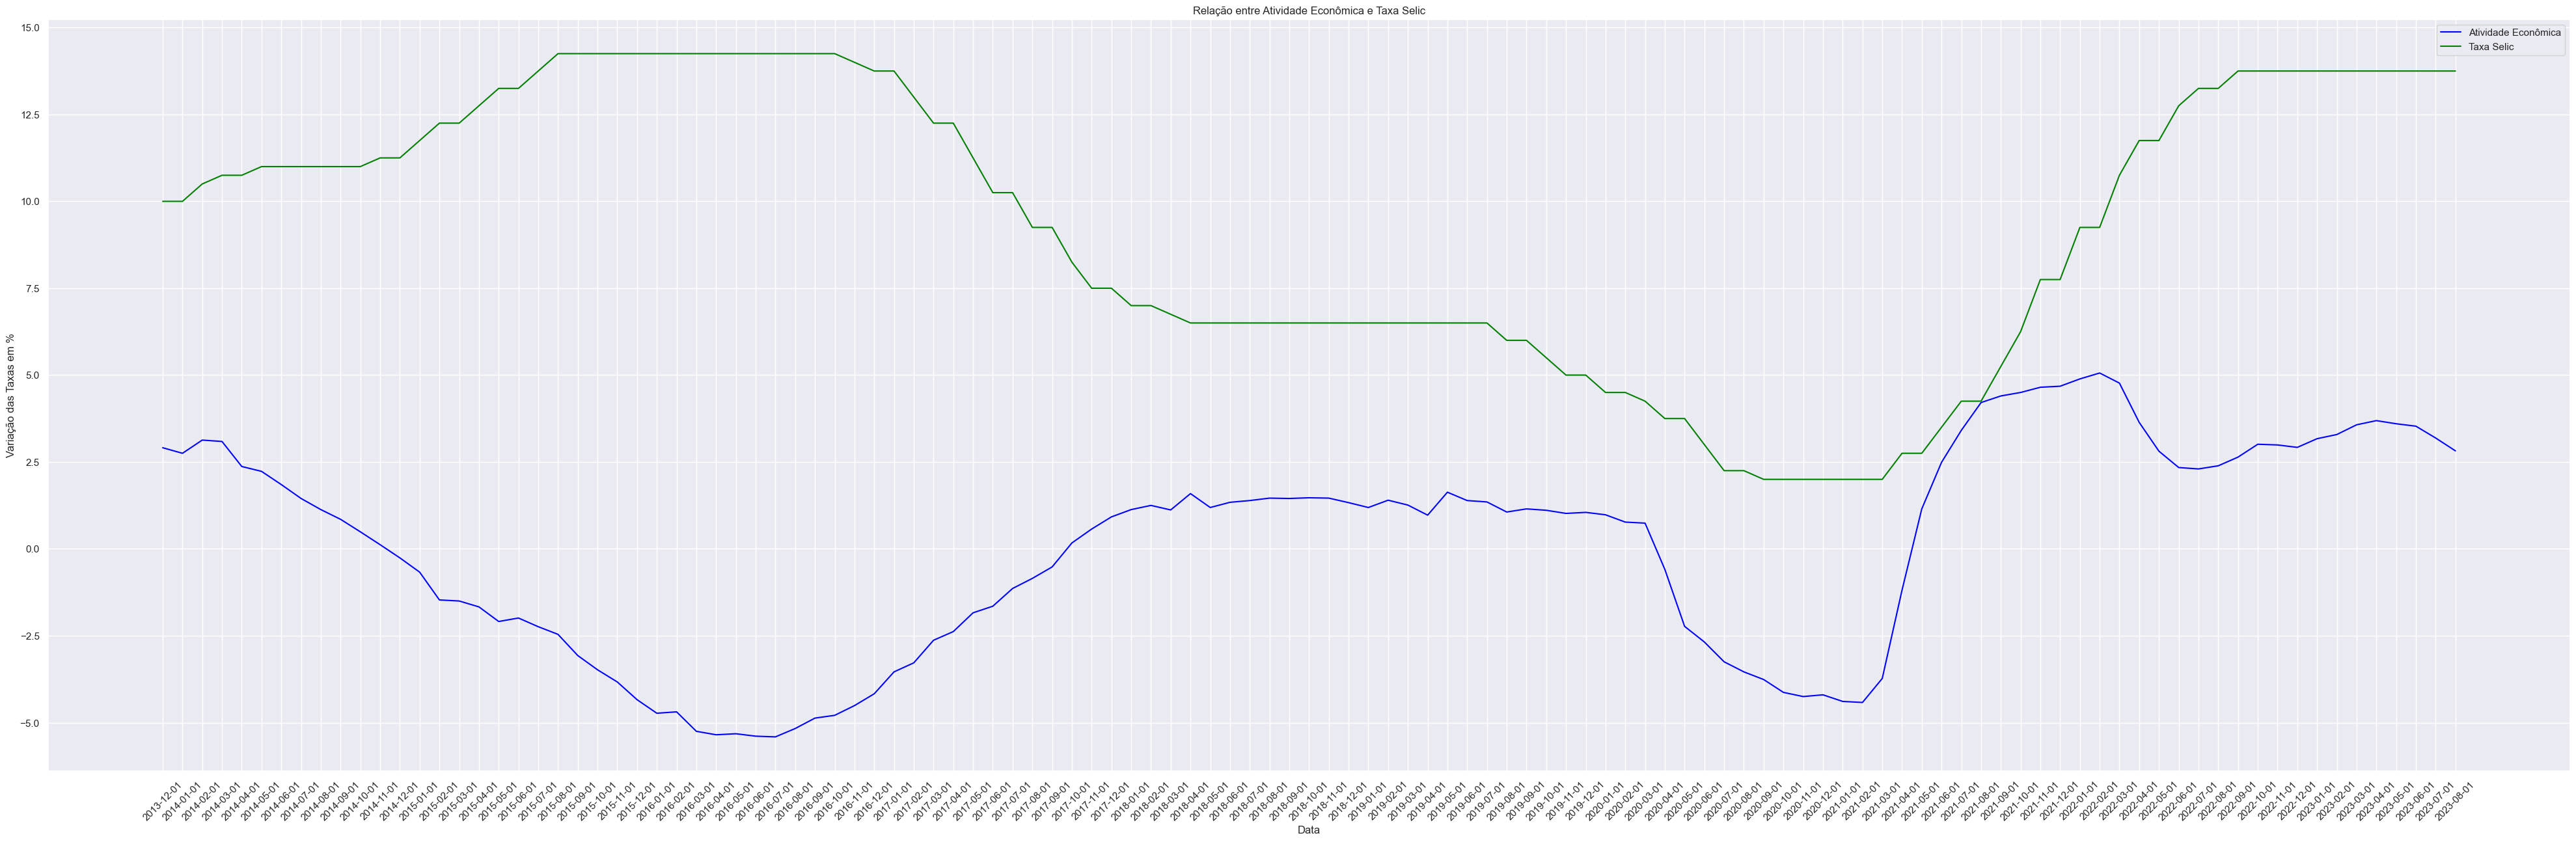

In [43]:
# Define o estilo do gráfico
sns.set(style="darkgrid")

# Cria o gráfico de linha
plt.figure(figsize=(50, 15))

# Plotar a Atividade Econômica
sns.lineplot(x=tabelas_selic_atividade_economica_unidas['DateTime'], y=tabelas_selic_atividade_economica_unidas['IBC-Br - atividade econômica'], label='Atividade Econômica', color='blue')

# Plotar a Taxa Selic
sns.lineplot(x=tabelas_selic_atividade_economica_unidas['DateTime'], y=tabelas_selic_atividade_economica_unidas['Selic'], label='Taxa Selic', color='green')
plt.xticks(rotation=45)

# Adiciona título e rótulos dos eixos
plt.title('Relação entre Atividade Econômica e Taxa Selic')
plt.xlabel('Data')
plt.ylabel('Variação das Taxas em %')

# Adiciona legenda
plt.legend()

# Exibe o gráfico
plt.show()

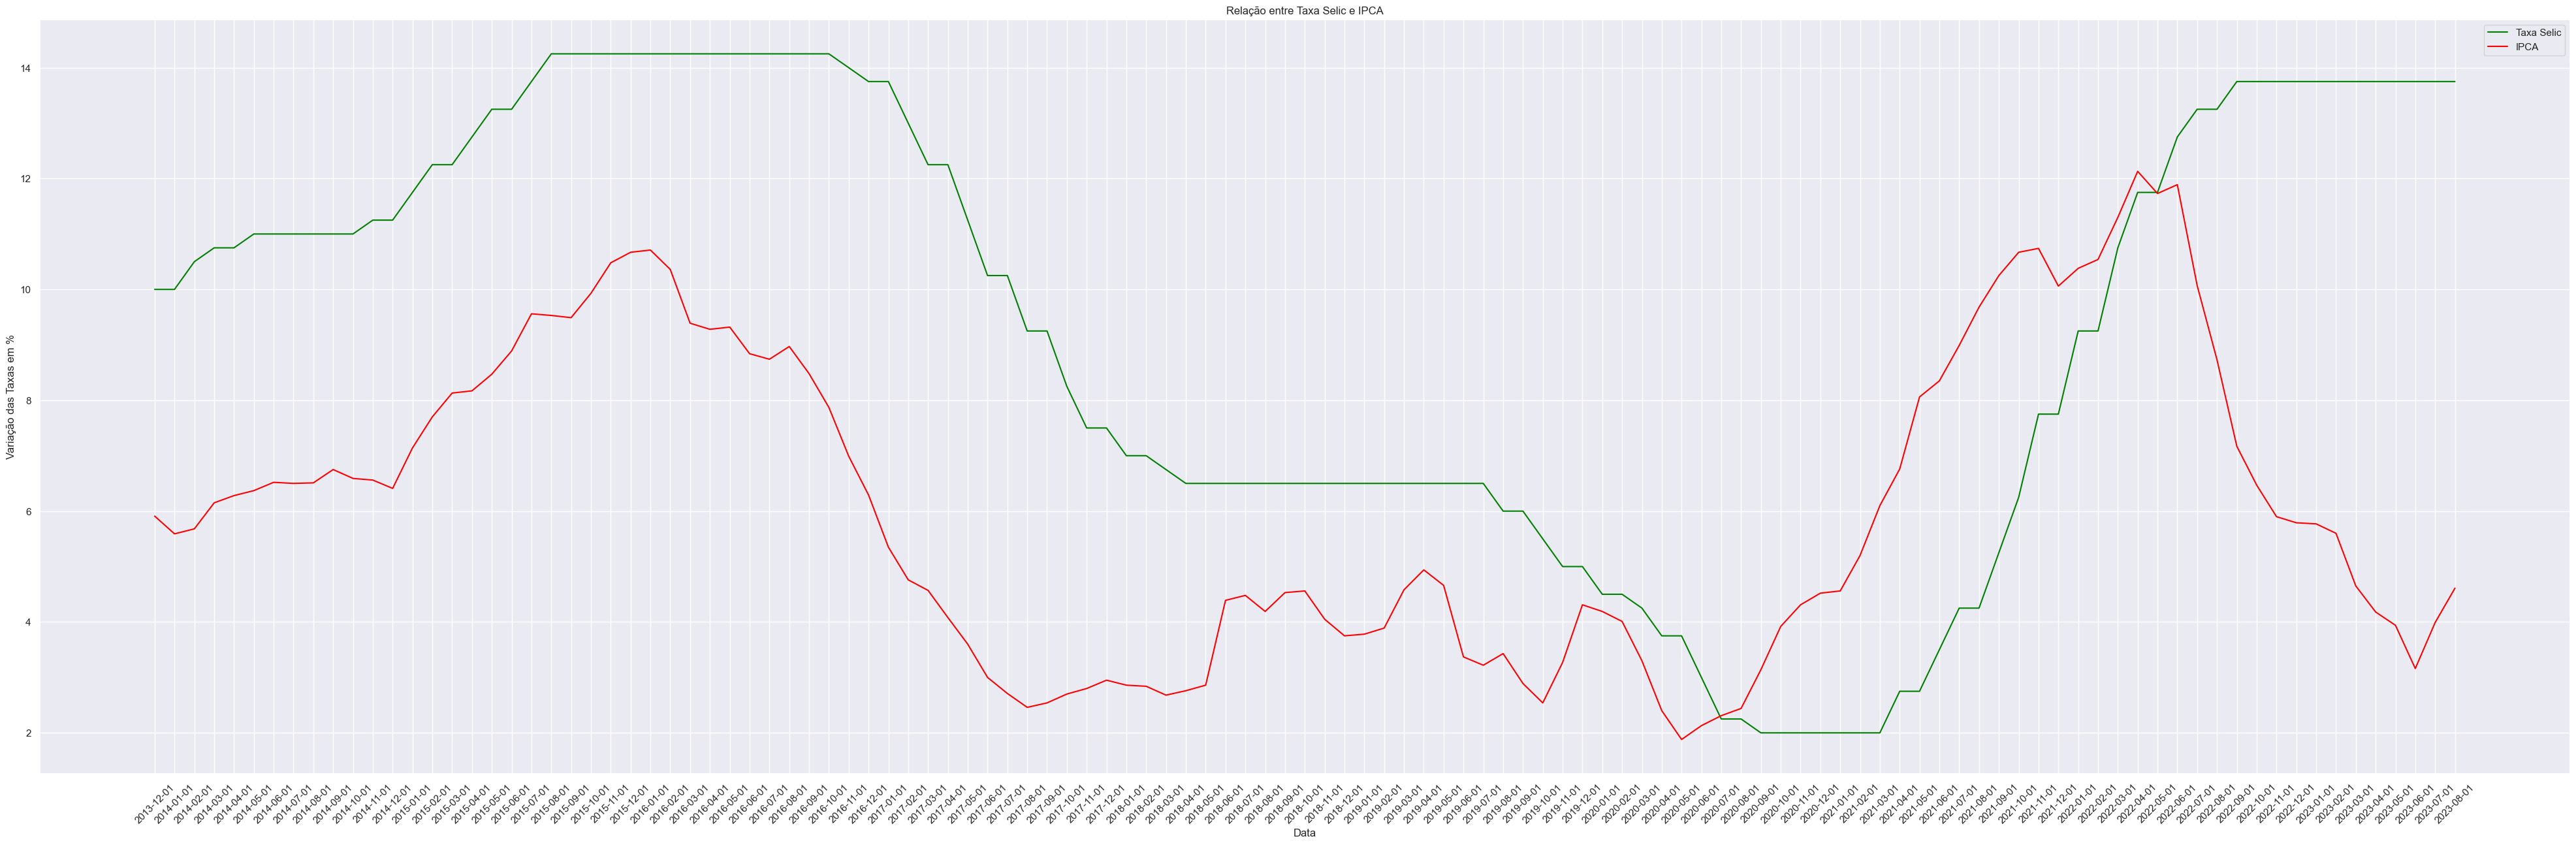

In [47]:
# Define o estilo do gráfico
sns.set(style="darkgrid")

# Cria o gráfico de linha
plt.figure(figsize=(50, 15))

# Plotar a Taxa Selic
sns.lineplot(x=tabelas_selic_atividade_economica_ipca_unidas['DateTime'], y=tabelas_selic_atividade_economica_ipca_unidas['Selic'], label='Taxa Selic', color='green')

# Plotar a Taxa Selic
sns.lineplot(x=tabelas_selic_atividade_economica_ipca_unidas['DateTime'], y=tabelas_selic_atividade_economica_ipca_unidas['IPCA ocorrido'], label='IPCA', color='red')
plt.xticks(rotation=45)

# Adiciona título e rótulos dos eixos
plt.title('Relação entre Taxa Selic e IPCA')
plt.xlabel('Data')
plt.ylabel('Variação das Taxas em %')

# Adiciona legenda
plt.legend()

# Exibe o gráfico
plt.show()

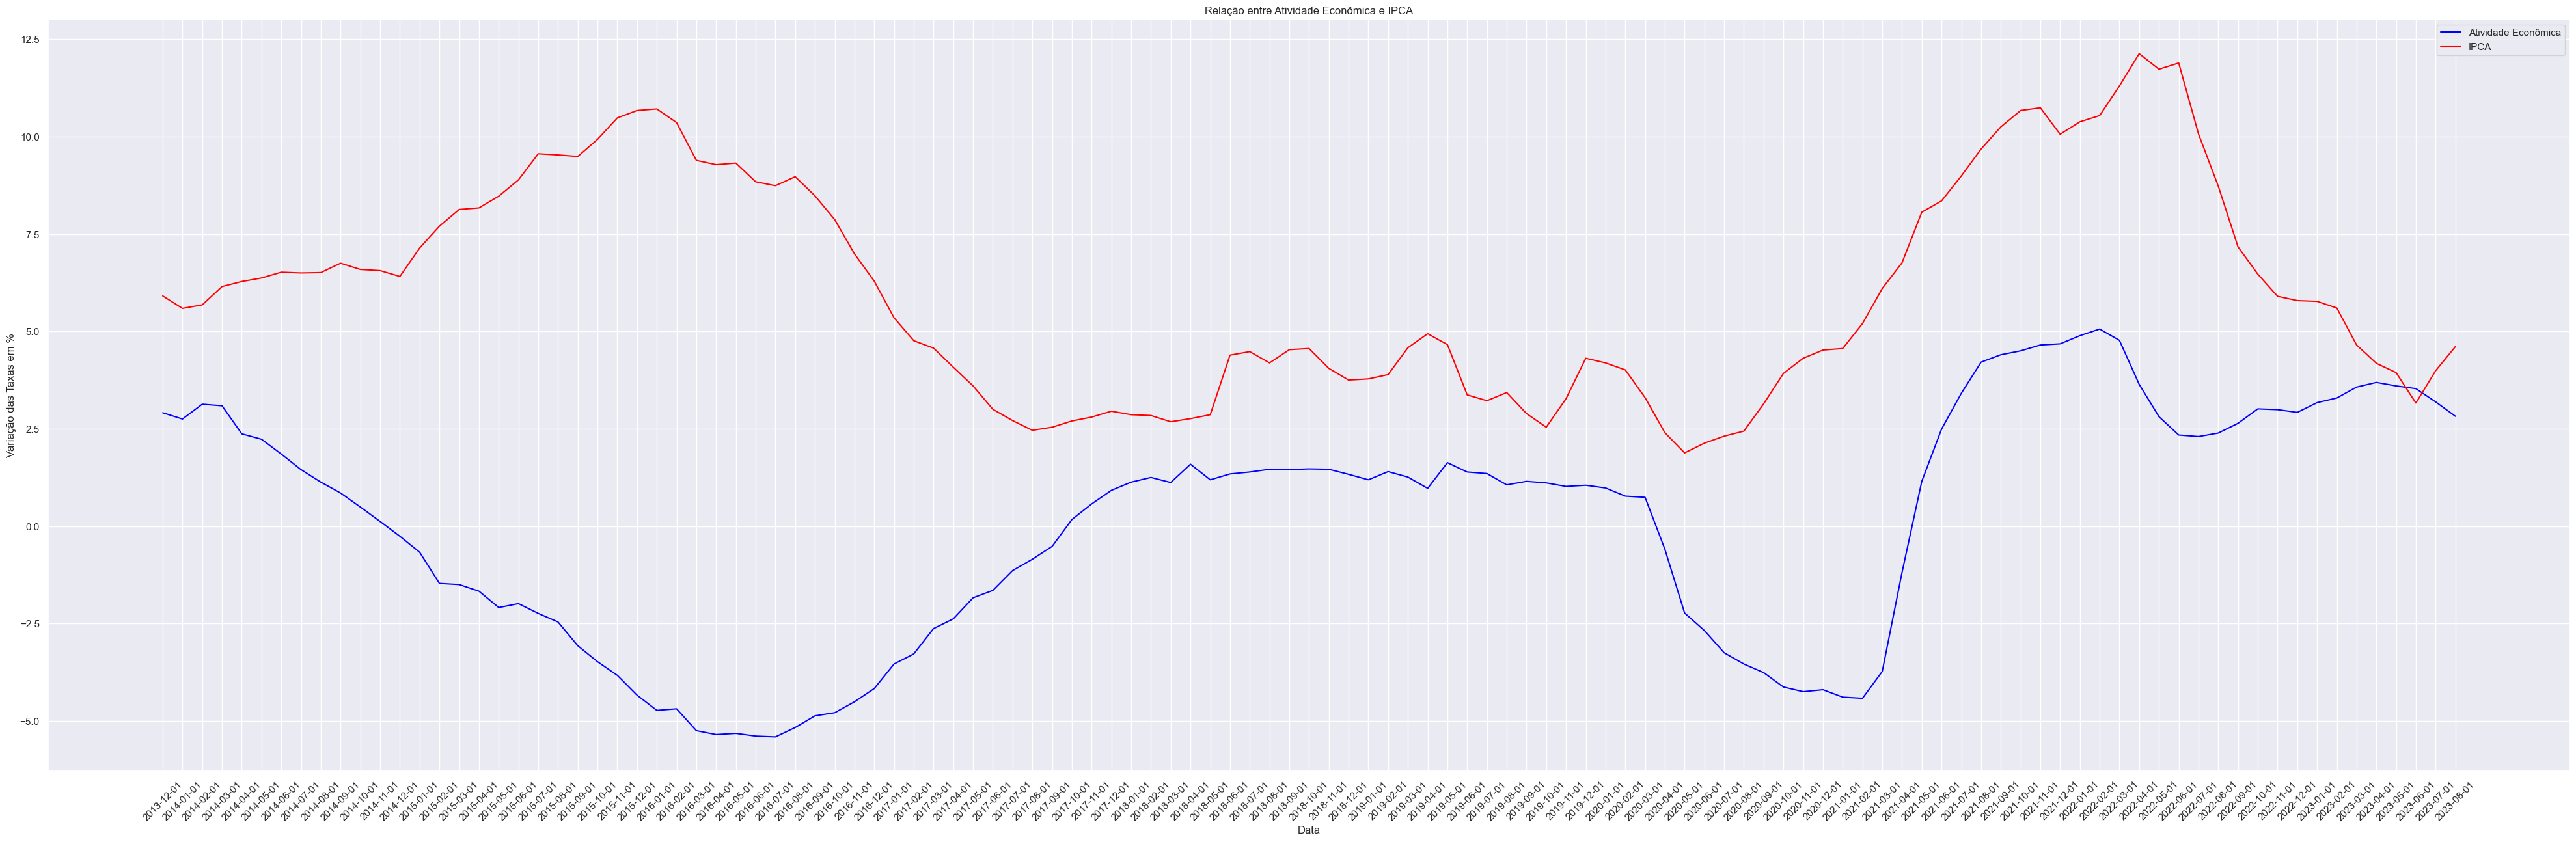

In [48]:
# Define o estilo do gráfico
sns.set(style="darkgrid")

# Cria o gráfico de linha
plt.figure(figsize=(50, 15))

# Plotar a Atividade Econômica
sns.lineplot(x=tabelas_selic_atividade_economica_ipca_unidas['DateTime'], y=tabelas_selic_atividade_economica_ipca_unidas['IBC-Br - atividade econômica'], label='Atividade Econômica', color='blue')

# Plotar a Taxa Selic
sns.lineplot(x=tabelas_selic_atividade_economica_ipca_unidas['DateTime'], y=tabelas_selic_atividade_economica_ipca_unidas['IPCA ocorrido'], label='IPCA', color='red')
plt.xticks(rotation=45)

# Adiciona título e rótulos dos eixos
plt.title('Relação entre Atividade Econômica e IPCA')
plt.xlabel('Data')
plt.ylabel('Variação das Taxas em %')

# Adiciona legenda
plt.legend()

# Exibe o gráfico
plt.show()

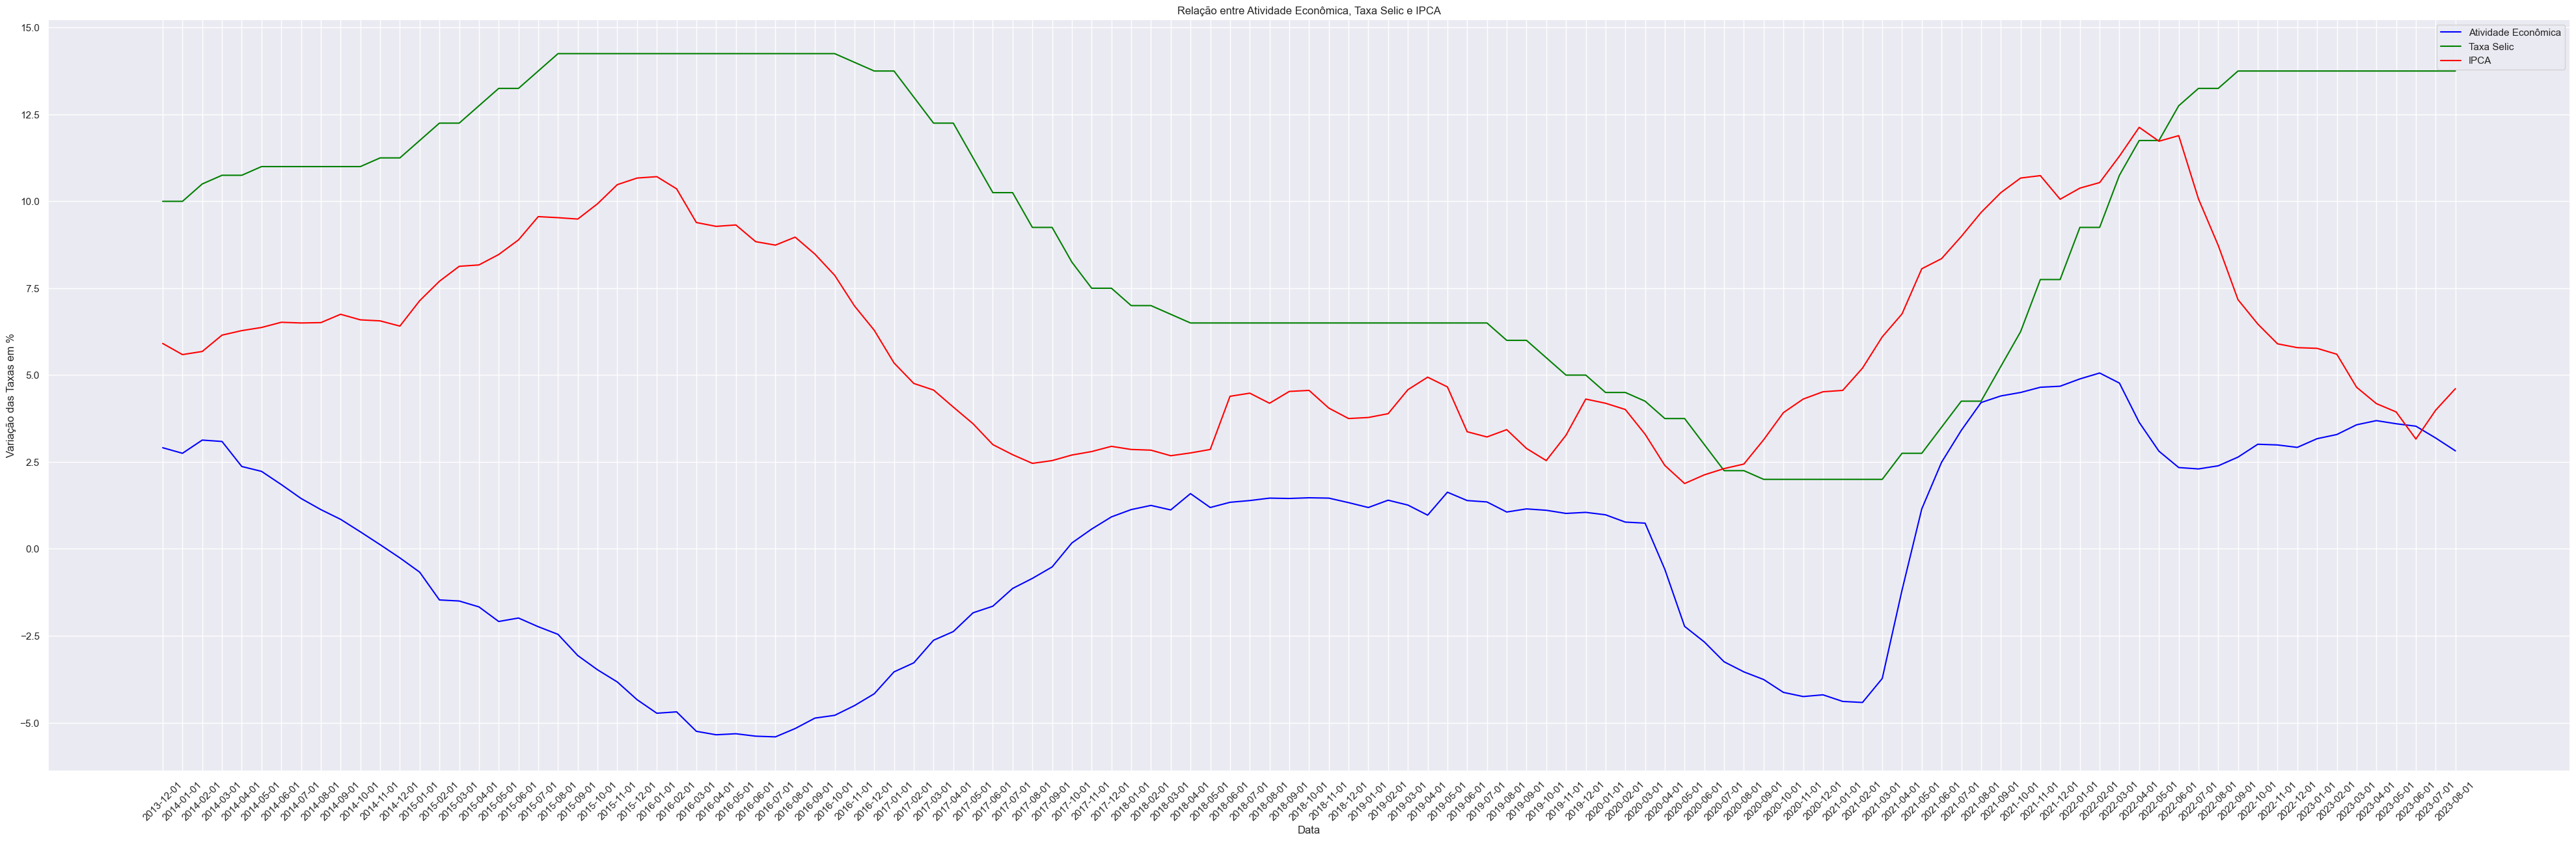

In [46]:
# Define o estilo do gráfico
sns.set(style="darkgrid")

# Cria o gráfico de linha
plt.figure(figsize=(50, 15))

# Plotar a Atividade Econômica
sns.lineplot(x=tabelas_selic_atividade_economica_ipca_unidas['DateTime'], y=tabelas_selic_atividade_economica_ipca_unidas['IBC-Br - atividade econômica'], label='Atividade Econômica', color='blue')

# Plotar a Taxa Selic
sns.lineplot(x=tabelas_selic_atividade_economica_ipca_unidas['DateTime'], y=tabelas_selic_atividade_economica_ipca_unidas['Selic'], label='Taxa Selic', color='green')

# Plotar a Taxa Selic
sns.lineplot(x=tabelas_selic_atividade_economica_ipca_unidas['DateTime'], y=tabelas_selic_atividade_economica_ipca_unidas['IPCA ocorrido'], label='IPCA', color='red')
plt.xticks(rotation=45)

# Adiciona título e rótulos dos eixos
plt.title('Relação entre Atividade Econômica, Taxa Selic e IPCA')
plt.xlabel('Data')
plt.ylabel('Variação das Taxas em %')

# Adiciona legenda
plt.legend()

# Exibe o gráfico
plt.show()